In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Loading califonia housing data

In [63]:
from sklearn.datasets import fetch_california_housing
califonia = fetch_california_housing()

In [64]:
califonia.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [65]:
print(califonia.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
print(califonia.feature_names)  #column names

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [67]:
print(califonia.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [88]:
dataset = pd.DataFrame(califonia.data, columns=califonia.feature_names)
print(dataset.head())                                 # created dataframe and added columns to the data 

#MedInc expressed as income of household in $10,000

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [89]:
print(califonia.data.shape) #total rows and cloumns

(20640, 8)


In [90]:
print(califonia.target) # price of house  Expressed in $100,000s  ( this is my dependent value) price

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [91]:
dataset["price"]=califonia.target     #adding column target as price in datset

In [102]:
dataset.head() # see here price also added in the dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [121]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [122]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


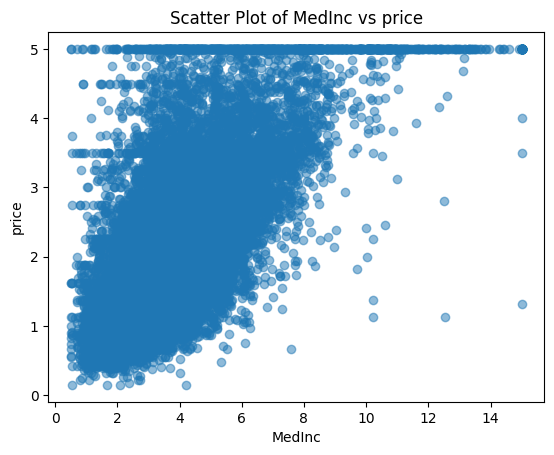

In [103]:
plt.scatter(dataset["MedInc"], dataset["price"], alpha=0.5)
plt.xlabel("MedInc")
plt.ylabel("price")
plt.title("Scatter Plot of MedInc vs price")
plt.show()

<Axes: xlabel='MedInc', ylabel='price'>

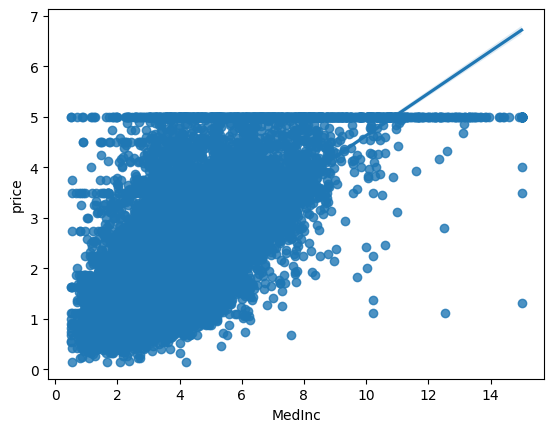

In [124]:
sns.regplot(x="MedInc", y= "price", data=dataset)

In [ ]:
dataset["price"].max(), dataset["price"].min()


(np.float64(5.00001), np.float64(0.14999))

In [123]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


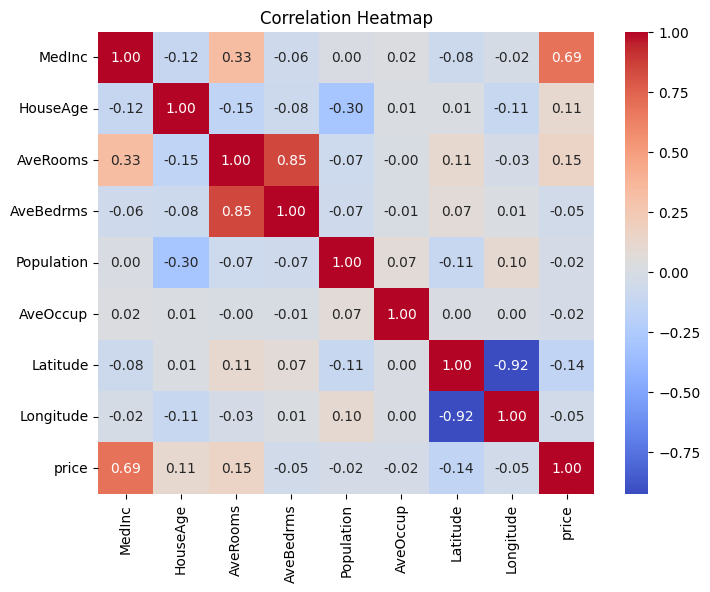

In [ ]:
#just visualised the correlation in heatmap
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

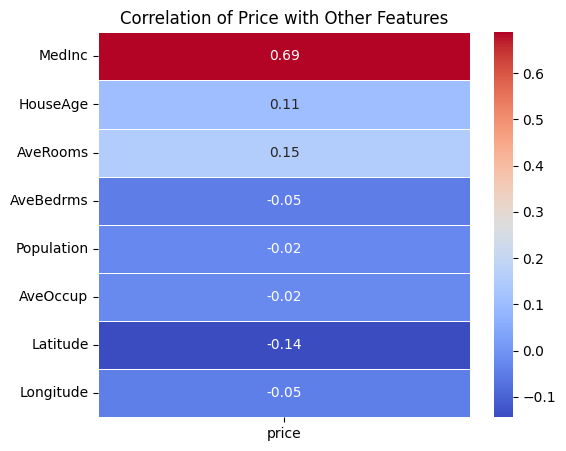

In [116]:
selected_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

# Compute the correlation of `price` with selected features
correlation_matrix = dataset[selected_features + ['price']].corr()

# Extract only the `price` correlation row
price_correlation = correlation_matrix[['price']].drop(index=['price'])  # Drop self-correlation

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(price_correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation of Price with Other Features")
plt.show()


In [ ]:
# removing outliers using Z-score
# Calculate Z-scores
z_scores = np.abs(stats.zscore(dataset))

# Define threshold (e.g., Z > 3 means an outlier)
dataset_clean = dataset[(z_scores < 3).all(axis=1)]

In [157]:
#Removing outliers using IQR method

# Define IQR boundaries
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers
dataset_clean = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check shape before and after
print("Original shape:", dataset.shape)
print("Cleaned shape:", dataset_clean.shape)


Original shape: (20640, 9)
Cleaned shape: (16312, 9)


In [158]:
x = dataset_clean.iloc[:,:-1] #indipendent
y = dataset_clean.iloc[:,-1]  #dependent

In [159]:
#test train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
print(skew(dataset_clean)) # perfect must be in between >2 or <-2

[ 0.53671258  0.01588511  0.10676042  0.24222423  0.71855305  0.33715765
  0.41080893 -0.2686725   0.69951145]


In [166]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11418, 8)
(4894, 8)
(11418,)
(4894,)


In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

MODEL TRAINING

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)   # it will create an hyper plane

LinearRegression()

In [173]:
# print the coeffecient
print(regression.coef_)

[ 0.65004888  0.12938006 -0.13086524  0.08430412  0.04886151 -0.22914947
 -0.85129384 -0.79414206]


In [174]:
print(regression.intercept_)

1.9361556305832939


In [176]:
# on which parameters the model has been trained 
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Prediction with the TEST DATA

In [198]:
reg_pred = regression.predict(x_test) ##############
reg_pred

array([2.72892938, 1.18266208, 2.53674801, ..., 1.51728279, 1.97380684,
       1.69903091], shape=(4894,))

Plot a scatter plot for the prediction


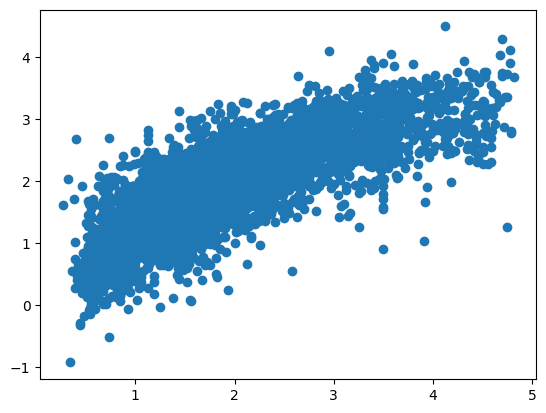

In [ ]:
plt.scatter(y_test, reg_pred)   # we are now comparinf y_test and X_test predicted value , it is leniar means our model is going good

In [181]:
# calculating the error
residuals = y_test - reg_pred
residuals

107     -0.134929
4989    -0.018662
8000    -0.452748
8624     1.806148
5       -0.138002
           ...   
16689   -0.483744
10404   -0.162977
7438     0.130717
16457   -0.425807
8439     0.325969
Name: price, Length: 4894, dtype: float64

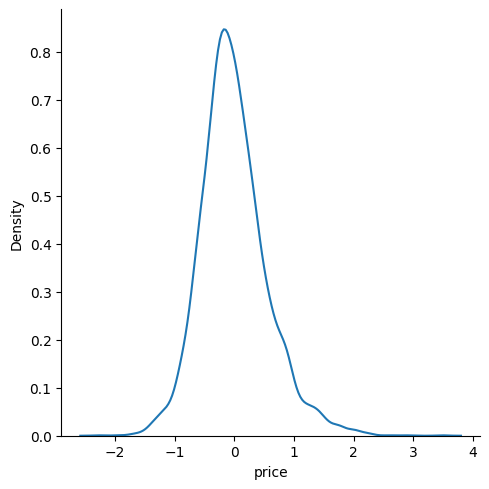

In [186]:
#plotting the residuals
sns.displot(residuals,kind="kde")

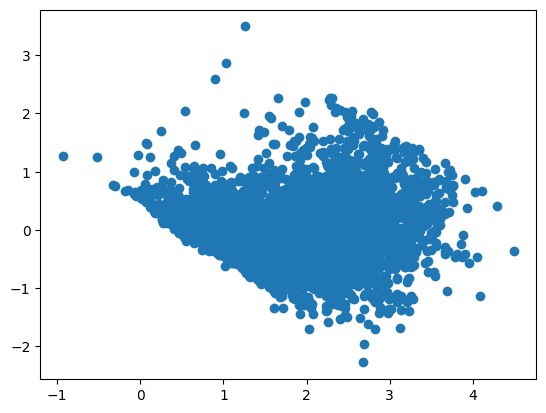

In [ ]:
plt.scatter(reg_pred, residuals) # unifor distribution with respect to predicted value and residuals

In [188]:
# to check performance metrices

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.42361889744557485
0.3102000375145814
0.5569560463039982


R2 and adj r2

In [199]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

#rsquared
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)      # note everywhere 

0.64368216739238


0.6430986376767484

Predicting new data

In [204]:
califonia.data[0].reshape (1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [206]:
#transformation of mew data
scaler.transform(califonia.data[0].reshape (1,-1))

c:\Users\HP\Desktop\My Projects\califonia_housing\California-Housing\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 3.21730342,  0.95046576,  1.74762548, -0.35377335, -1.51818048,
        -0.48979289,  1.02939939, -1.29991306]])

In [207]:
regression.predict(scaler.transform(califonia.data[0].reshape (1,-1)))

c:\Users\HP\Desktop\My Projects\califonia_housing\California-Housing\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.08605294])

I have done pickling before , so no need to run

In [210]:
import pickle
pickle.dump(regression,open("regmodel.pkl",'wb'))
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [211]:
pickled_model.predict(scaler.transform(califonia.data[0].reshape (1,-1)))

c:\Users\HP\Desktop\My Projects\califonia_housing\California-Housing\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.08605294])